# ANNOT Flags impact in data processing

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type


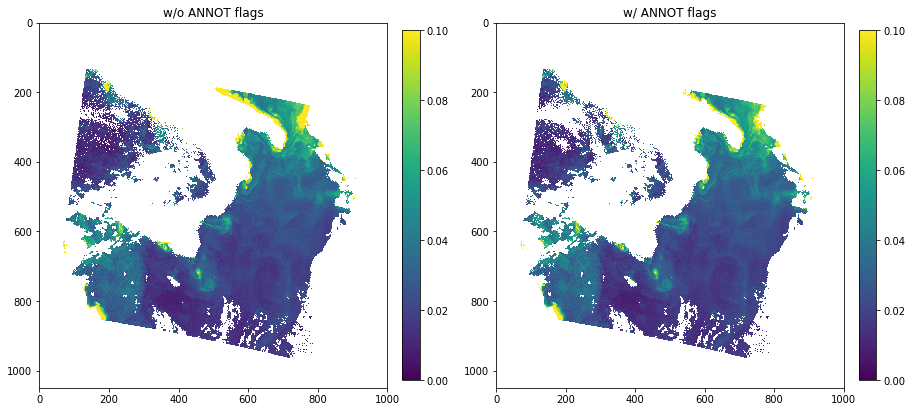

In [3]:
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
import sys, os
from matplotlib import pyplot as plt


path = '/Users/javier/Desktop/Javier/2019_ROMA/CNR_Research/OLCI_flag_comp/'
filename1 = 'O2017200090106--med-hr_brdf.nc'
filename2 = 'O2017200090106--med-hr_brdf_w_ANNOT_DROUT.nc'

nc_f1=Dataset(path+filename1, 'r')
nc_f2=Dataset(path+filename2, 'r')

var1=nc_f1.variables
var2=nc_f2.variables

chl1 = var1['chl'][250:1300,1200:2200]
chl2 = var2['chl'][250:1300,1200:2200]

# chl1 = chl1

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
current_cmap = plt.cm.get_cmap()
current_cmap.set_bad(color='white')
plt.imshow(chl1,vmin=0, vmax=0.1) 
plt.title('w/o ANNOT flags')
plt.colorbar(fraction=0.046, pad=0.04)
# plt.ylabel('Damped oscillation')

plt.subplot(1, 2, 2)
current_cmap = plt.cm.get_cmap()
current_cmap.set_bad(color='white')
plt.imshow(chl2,vmin=0, vmax=0.1)
plt.title('w/ ANNOT flags')
plt.colorbar(fraction=0.046, pad=0.04)
# plt.xlabel('time (s)')
# plt.ylabel('Undamped')

plt.show()

25.513855
0.00015568215
<class 'numpy.ma.core.MaskedArray'>
22.922792
0.0010631433
<class 'numpy.ma.core.MaskedArray'>


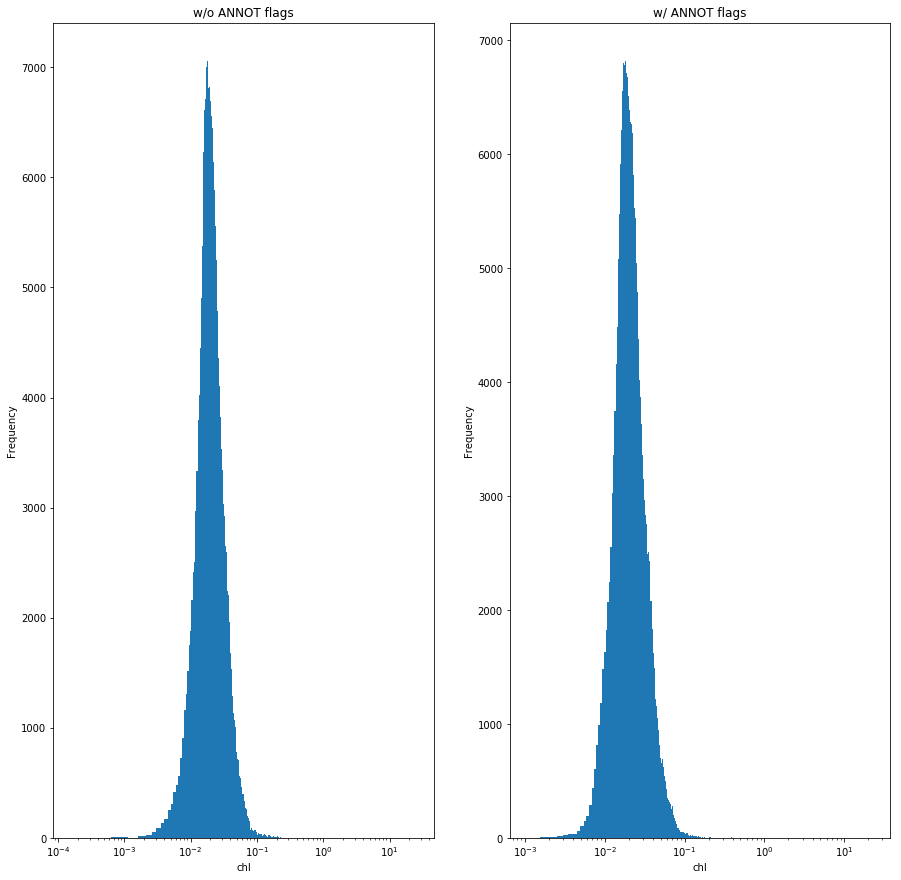

In [5]:
# w/o ANNOT flags
print(np.amax(chl1))
print(np.amin(chl1))
print(type(chl1))

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.hist(chl1[~chl1.mask], bins='auto') 
plt.xscale('log')
plt.title('w/o ANNOT flags')
plt.xlabel('chl')
plt.ylabel('Frequency')

# w/ ANNOT flags
print(np.amax(chl2))
print(np.amin(chl2))
print(type(chl2))

plt.subplot(1, 2, 2)
plt.hist(chl2[~chl2.mask], bins='auto') 
plt.xscale('log')
plt.title('w/ ANNOT flags')
plt.xlabel('chl')
plt.ylabel('Frequency')

plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
current_cmap = plt.cm.get_cmap()
current_cmap.set_bad(color='white')
plt.imshow(chl1-chl2) 
plt.title('Diff')
plt.colorbar(fraction=0.046, pad=0.04)
# plt.ylabel('Damped oscillation')